### CIFAR-10 compression using PCA

In this code, we see the application of PCA on CIFAR-10 data.

(10000, 3072)


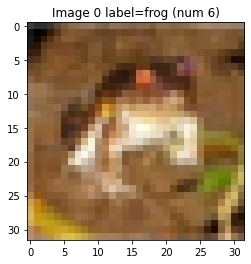

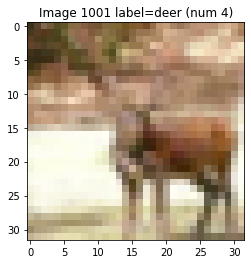

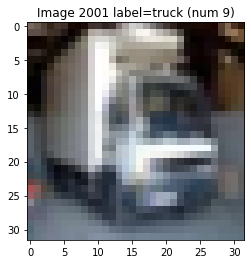

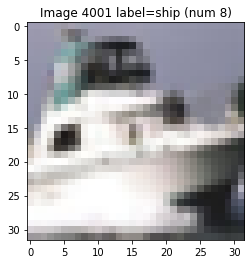

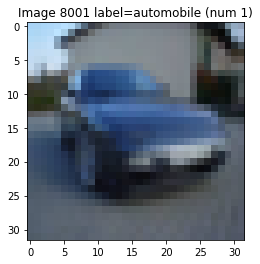

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from random import random
from sklearn.decomposition import PCA

def unpickle(file):
    with open(file, 'rb') as f:
        dict = pickle.load(f, encoding="latin1")
    return dict

datadict = unpickle(r'\data_batch_1') #change path to cifar data (download from dataset folder)

X = datadict["data"]
Y = datadict["labels"]

X=np.array(X)/255.0   #Normalize the Image data between 0 and 1

print(X.shape)

labeldict = unpickle(r'\batches.meta') #change path to cifar data (download from dataset folder)
label_names = labeldict["label_names"]


#Lets visualize some of the images.

X_img = X.reshape(10000, 3, 32, 32).transpose(0,2,3,1)
Y = np.array(Y)

# Show some images
show_inds = [0, 1001, 2001, 4001, 8001]

for i in show_inds:
        plt.figure(1);
        plt.clf()
        plt.imshow(X_img[i])
        plt.title(f"Image {i} label={label_names[Y[i]]} (num {Y[i]})")
        plt.pause(.1)

Now, lets use PCA transform on the images. Change the **n_components** part to get n number of significant components of image.

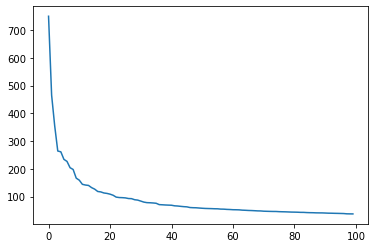

In [2]:
pca = PCA(n_components=100)
pca.fit(X)

plt.plot(pca.singular_values_)
# print(pca.explained_variance_ratio_)  #To see the first n components

Now, we will project all original images to the PCA vectors and thus compress their information. If there is enough components the images should theoretically be indistinguishable from the original image.

(10000, 100)
(10000, 3072)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


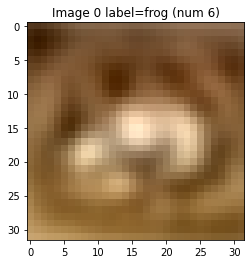

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


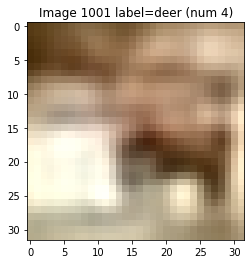

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


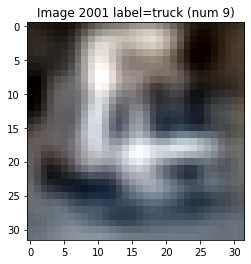

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


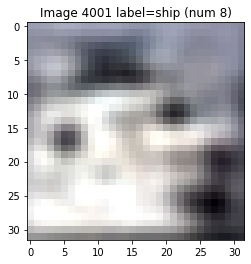

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


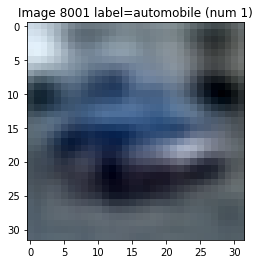

In [4]:
X_pca = pca.transform(X)
print(X_pca.shape)

X_approx = pca.inverse_transform(X_pca)  #to get approximate image array formed by using pca components.
print(X_approx.shape)

X_approx_img = X_approx.reshape(10000, 3, 32, 32).transpose(0,2,3,1)

for i in show_inds:
        plt.figure(1);
        plt.clf()
        plt.imshow(X_approx_img[i])
        plt.title(f"Image {i} label={label_names[Y[i]]} (num {Y[i]})")
        plt.pause(.1)

In [7]:
X_pca[0]

array([-6.54064049, -2.76451747,  1.39430351,  1.64285527, -5.11509873,
        1.1597419 , -0.47509373,  1.13500931,  3.06525536,  1.19505493,
        0.36538171, -0.28126681, -0.03372713, -0.42839264,  0.64349282,
       -0.8810375 ,  0.61685462, -0.06537437,  0.82710953,  0.16229973,
        0.30549687, -1.43119144, -0.21641552, -0.66311331,  1.50756946,
       -0.34642257, -0.69556301,  1.36854035,  1.23718506, -0.37725583,
        0.02777116, -0.82939419, -0.2571006 , -1.34662573,  0.63441218,
        0.04863349, -0.33424202, -0.54131439,  0.96258983,  0.27872999,
       -0.57223095,  0.25257801, -0.72823207,  0.45109591, -0.30111355,
       -0.08919883, -0.45805084, -0.51148211,  0.48811061,  0.89132001,
       -0.67600994, -0.61551034,  0.1048786 , -0.33628321, -0.47778   ,
       -0.48327373, -0.14650401, -0.1502694 ,  0.750072  , -0.46090788,
        0.38608219, -0.80302699, -0.14284607,  0.01060881, -0.46287431,
       -0.19894708,  0.84238812,  0.11722476, -0.01625718, -0.50